## Day 18 Landuse

### Data

- 

In [2]:
import geopandas as gpd

est_shape_isea7h_8 = gpd.read_file(r'C:\dev\05_geodata\articles\dggs_examples\grids\est_shape_isea7h_8.shp')

In [3]:
estonia_without_lakes = gpd.read_file(r'C:\dev\05_geodata\dem\countries\estonia_without_lakes.shp')

In [4]:
len(estonia_without_lakes)

1

In [8]:
touches_eesti = est_shape_isea7h_8.intersects(estonia_without_lakes.loc[0, 'geometry'])

In [16]:
est_hex = est_shape_isea7h_8.loc[touches_eesti].copy()

In [17]:
len(est_hex)

5410

In [11]:
points = est_hex.centroid

C:\dev\conda3\envs\geopy2020\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [12]:
from rasterstats import zonal_stats, point_query

In [42]:
pts = point_query(points, r'D:\data\ECMWF_CCI_Landuse\C3S-LC-L4-LCCS-Map-300m-P1Y-2018-v2.1.1_mode.tif', nodata=0)

In [43]:
est_hex['lulc_class'] = pts

In [166]:
import pandas as pd

zones = zonal_stats(est_hex['geometry'], r'D:\data\ECMWF_CCI_Landuse\C3S-LC-L4-LCCS-Map-300m-P1Y-2018-v2.1.1_mode.tif', nodata=0, stats=['majority', 'median'], touched='all')

est_hex['lulc_class_zone'] = pd.DataFrame(zones)['majority'].values

In [167]:
pd.DataFrame(zones).sample(5)

,median,majority
1131,210.0,210.0
2741,11.0,10.0
1033,60.0,60.0
5012,90.0,70.0
5102,90.0,90.0


In [170]:
est_hex.sample(5)

,Name,geometry,lulc_class,lulc_class_zone,lulc_class_man,lulc_class_reduced
9762,17911433,"POLYGON ((24.56995 58.99156, 24.59707 58.98390...",70.000000,70.0,70,70
11682,17956999,"POLYGON ((27.08752 57.64586, 27.11295 57.63772...",100.000000,100.0,100,100
10396,17925855,"POLYGON ((24.35933 59.42542, 24.38688 59.41779...",98.254058,70.0,100,100
15766,18072307,"POLYGON ((27.72568 59.33743, 27.75237 59.32916...",90.000000,70.0,90,90
9217,17899394,"POLYGON ((25.37621 58.08819, 25.40238 58.08037...",39.360865,10.0,40,40


In [171]:
flag_colors = "#ffff64 #ffff64 #ffff00 #aaf0f0 #dcf064 #c8c864 #006400 #00a000 #00a000 #aac800 #003c00 #003c00 #005000 #285000 #285000 #286400 #788200 #8ca000 #be9600 #966400 #966400 #966400 #ffb432 #ffdcd2 #ffebaf #ffc864 #ffd278 #ffebaf #00785a #009678 #00dc82 #c31400 #fff5d7 #dcdcdc #fff5d7 #0046c8 #ffffff".split(' ')

In [172]:
flag_values = [0,10,11,12,20,30,40,50,60,61,62,70,71,72,80,81,82,90,100,110,120,121,122,130,140,150,151,152,153,160,170,180,190,200,201,202,210,220]

In [173]:
flag_info = list(zip(flag_values, flag_colors))

In [174]:
import matplotlib.pyplot as plt

In [175]:
import numpy as np

def finalize_cci_class(v):
    dist = np.abs(np.array(flag_values) - int(v))
    idx = np.argmin(dist)
    return flag_values[idx]
    
est_hex['lulc_class_man'] = est_hex['lulc_class'].apply(finalize_cci_class)

In [176]:
est_hex.sample(5)

,Name,geometry,lulc_class,lulc_class_zone,lulc_class_man,lulc_class_reduced
13200,17990650,"POLYGON ((26.69676 58.65883, 26.72311 58.65076...",10.969673,10.0,10,10
13780,18005039,"POLYGON ((27.48557 58.22034, 27.51137 58.21213...",210.000000,210.0,210,210
7841,17865820,"POLYGON ((23.43269 59.08546, 23.46014 59.07801...",73.136081,210.0,72,70
13330,17993077,"POLYGON ((25.96257 59.34637, 25.98968 59.33844...",70.000000,70.0,70,70
9667,17909040,"POLYGON ((24.26508 59.19628, 24.29244 59.18868...",73.108884,90.0,72,70


In [277]:
est_hex_3301 = est_hex.to_crs(3301)

In [178]:
import matplotlib

cci_cmap = matplotlib.colors.ListedColormap(flag_colors, name='CCI')

<AxesSubplot:>

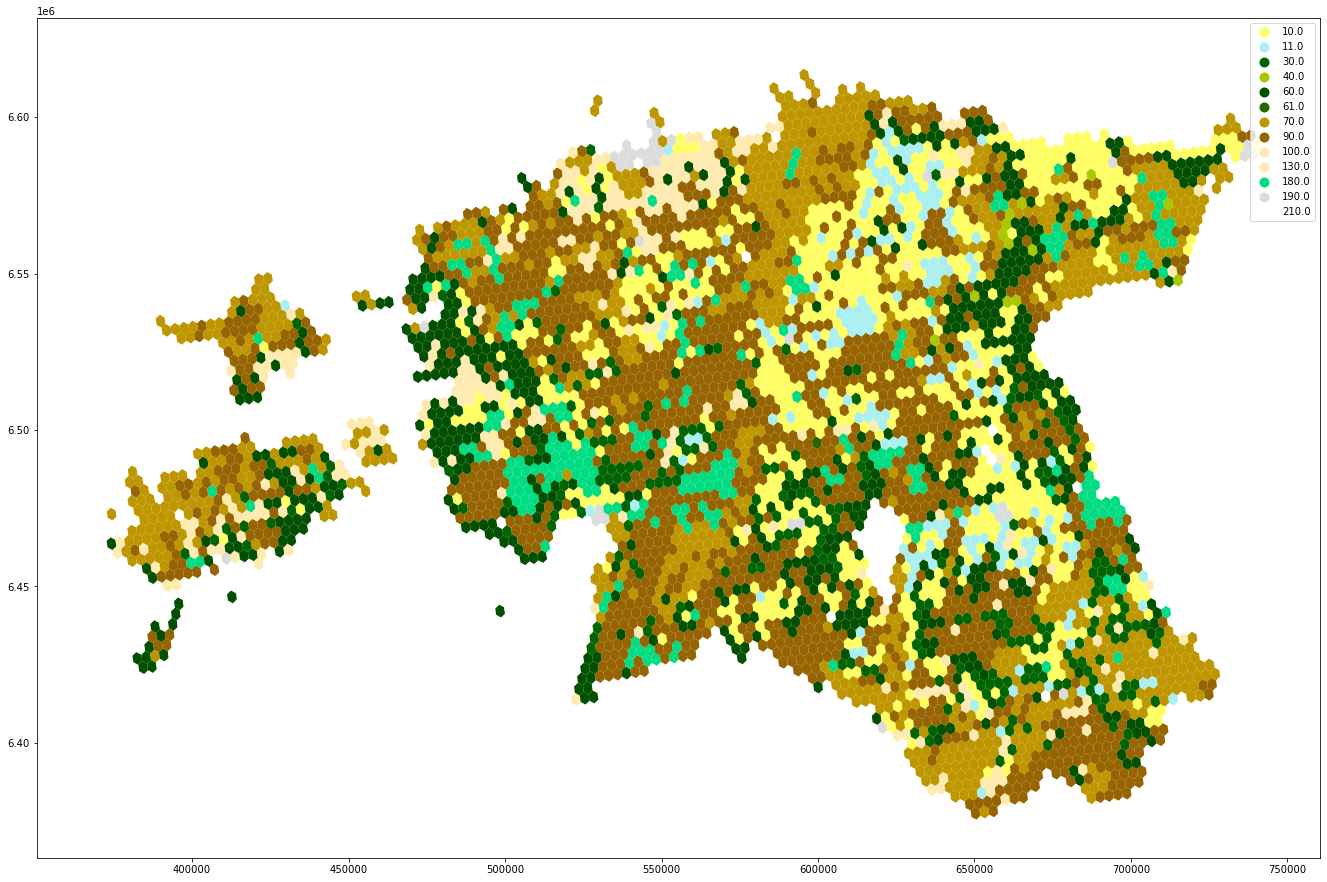

In [198]:
fig, ax = plt.subplots(figsize=(23,19))

est_hex_3301.plot(column='lulc_class_zone', categorical=True, cmap=cci_cmap, ax=ax, legend=True)

In [199]:
legend_text = """    0#No Data
    10#Cropland, rainfed
    20#Cropland, irrigated or post-flooding
    30#Mosaic cropland (>50%) / natural vegetation (tree, shrub, herbaceous cover) (<50%)
    40#Mosaic natural vegetation (tree, shrub, herbaceous cover) (>50%) / cropland (<50%)
    50#Tree cover, broadleaved, evergreen, closed to open (>15%)
    60#Tree cover, broadleaved, deciduous, closed to open (>15%)
    70#Tree cover, needleleaved, evergreen, closed to open (>15%)
    80#Tree cover, needleleaved, deciduous, closed to open (>15%)
    90#Tree cover, mixed leaf type (broadleaved and needleleaved)
    100#Mosaic tree and shrub (>50%) / herbaceous cover (<50%)
    110#Mosaic herbaceous cover (>50%) / tree and shrub (<50%)
    120#Shrubland
    130#Grassland
    140#Lichens and mosses
    150#Sparse vegetation (tree, shrub, herbaceous cover) (<15%)
    160#Tree cover, flooded, fresh or brackish water
    170#Tree cover, flooded, saline water
    180#Shrub or herbaceous cover, flooded, fresh/saline/brackishwater
    190#Urban areas
    200#Bare areas
    210#Water bodies
    220#Permanent snow and ice""".split('\n')

In [200]:
leg_strip = [x.strip() for x in legend_text]

In [201]:
import toolz

def refin(s):
    if len(s) > 0:
        try:
            l = s.split('#')
            return { l[0]: l[1] }
        except IndexError as ex:
            print(s)
            print(ex)
    else:
        return {-10: 'nan'}

leg_join = list(map(refin, leg_strip))

In [202]:
leg_join

[{'0': 'No Data'},
 {'10': 'Cropland, rainfed'},
 {'20': 'Cropland, irrigated or post-flooding'},
 {'30': 'Mosaic cropland (>50%) / natural vegetation (tree, shrub, herbaceous cover) (<50%)'},
 {'40': 'Mosaic natural vegetation (tree, shrub, herbaceous cover) (>50%) / cropland (<50%)'},
 {'50': 'Tree cover, broadleaved, evergreen, closed to open (>15%)'},
 {'60': 'Tree cover, broadleaved, deciduous, closed to open (>15%)'},
 {'70': 'Tree cover, needleleaved, evergreen, closed to open (>15%)'},
 {'80': 'Tree cover, needleleaved, deciduous, closed to open (>15%)'},
 {'90': 'Tree cover, mixed leaf type (broadleaved and needleleaved)'},
 {'100': 'Mosaic tree and shrub (>50%) / herbaceous cover (<50%)'},
 {'110': 'Mosaic herbaceous cover (>50%) / tree and shrub (<50%)'},
 {'120': 'Shrubland'},
 {'130': 'Grassland'},
 {'140': 'Lichens and mosses'},
 {'150': 'Sparse vegetation (tree, shrub, herbaceous cover) (<15%)'},
 {'160': 'Tree cover, flooded, fresh or brackish water'},
 {'170': 'Tree co

In [203]:
leg_dict = {}

for d in leg_join:
    leg_dict = toolz.assoc(leg_dict, list(d.keys())[0], list(d.values())[0])

print(leg_dict)

{'0': 'No Data', '10': 'Cropland, rainfed', '20': 'Cropland, irrigated or post-flooding', '30': 'Mosaic cropland (>50%) / natural vegetation (tree, shrub, herbaceous cover) (<50%)', '40': 'Mosaic natural vegetation (tree, shrub, herbaceous cover) (>50%) / cropland (<50%)', '50': 'Tree cover, broadleaved, evergreen, closed to open (>15%)', '60': 'Tree cover, broadleaved, deciduous, closed to open (>15%)', '70': 'Tree cover, needleleaved, evergreen, closed to open (>15%)', '80': 'Tree cover, needleleaved, deciduous, closed to open (>15%)', '90': 'Tree cover, mixed leaf type (broadleaved and needleleaved)', '100': 'Mosaic tree and shrub (>50%) / herbaceous cover (<50%)', '110': 'Mosaic herbaceous cover (>50%) / tree and shrub (<50%)', '120': 'Shrubland', '130': 'Grassland', '140': 'Lichens and mosses', '150': 'Sparse vegetation (tree, shrub, herbaceous cover) (<15%)', '160': 'Tree cover, flooded, fresh or brackish water', '170': 'Tree cover, flooded, saline water', '180': 'Shrub or herbac

In [185]:
est_hex_3301['lulc_class_man'].fillna(value=0, inplace=True)

In [229]:
flag_info_reduced = []

for tup in flag_info:
    idx = str(tup[0])
    if idx in leg_dict.keys():
        if idx == '0':
            flag_info_reduced.append( ( idx, '#000000' ) )
        elif idx == '190':
            flag_info_reduced.append( ( idx, '#d911a7' ) )
        elif idx == '210':
            flag_info_reduced.append( ( idx, '#2e25cc' ) )
        else:
            flag_info_reduced.append( tup )


cci_cmap_red = matplotlib.colors.ListedColormap([i[1] for i in flag_info_reduced], name='CCIRed')

In [230]:
[(idx, i) for idx, i in enumerate(flag_info_reduced)]

[(0, ('0', '#000000')),
 (1, (10, '#ffff64')),
 (2, (20, '#dcf064')),
 (3, (30, '#c8c864')),
 (4, (40, '#006400')),
 (5, (50, '#00a000')),
 (6, (60, '#00a000')),
 (7, (70, '#003c00')),
 (8, (80, '#285000')),
 (9, (90, '#8ca000')),
 (10, (100, '#be9600')),
 (11, (110, '#966400')),
 (12, (120, '#966400')),
 (13, (130, '#ffdcd2')),
 (14, (140, '#ffebaf')),
 (15, (150, '#ffc864')),
 (16, (160, '#009678')),
 (17, (170, '#00dc82')),
 (18, (180, '#c31400')),
 (19, ('190', '#d911a7')),
 (20, (200, '#dcdcdc')),
 (21, ('210', '#2e25cc'))]

In [231]:
100 / len(flag_info_reduced)

4.545454545454546

In [232]:
def finalize_cci_class_reduced(v):
    dist = np.abs(np.array([int(i[0]) for i in flag_info_reduced]) - int(v))
    idx = np.argmin(dist)
    return str(flag_info_reduced[idx][0])
    
est_hex['lulc_class_reduced'] = est_hex['lulc_class_zone'].apply(finalize_cci_class_reduced)

In [233]:
est_hex['no_same'] = est_hex.apply(lambda x: not int(x['lulc_class_reduced']) == int(x['lulc_class_zone']), axis=1)

In [234]:
est_hex.loc[est_hex['no_same']].sample(10)

,Name,geometry,lulc_class,lulc_class_zone,lulc_class_man,lulc_class_reduced,no_same
13409,17995455,"POLYGON ((26.70715 58.74266, 26.73357 58.73459...",60.000000,11.0,60,10,True
12958,17985819,"POLYGON ((27.43775 57.88448, 27.46329 57.87627...",15.372271,11.0,12,10,True
10958,17940200,"POLYGON ((26.52167 57.84224, 26.54738 57.83420...",11.000000,11.0,11,10,True
11311,17947444,"POLYGON ((25.44100 58.93012, 25.46787 58.92229...",10.185323,11.0,10,10,True
14179,18014679,"POLYGON ((26.62984 59.18323, 26.65666 59.17517...",36.413063,11.0,40,10,True
12428,17973814,"POLYGON ((27.19627 57.87402, 27.22185 57.86585...",11.000000,11.0,11,10,True
13006,17985867,"POLYGON ((26.02605 59.15510, 26.05298 59.14715...",10.218989,11.0,10,10,True
14013,18009889,"POLYGON ((26.16372 59.49467, 26.19092 59.48670...",59.830719,11.0,60,10,True
13626,18000275,"POLYGON ((26.26701 59.22217, 26.29394 59.21418...",11.000000,11.0,11,10,True
12470,17973856,"POLYGON ((25.95866 58.98499, 25.98545 58.97706...",87.381512,11.0,90,10,True


In [274]:
uni_cls = est_hex['lulc_class_reduced'].unique().tolist()
uni_cls = est_hex['lulc_class_reduced_num'] = est_hex['lulc_class_reduced'].apply(pd.to_numeric)

In [275]:
est_hex.dtypes

Name                        object
geometry                  geometry
lulc_class                 float64
lulc_class_zone            float64
lulc_class_man               int64
lulc_class_reduced          object
no_same                       bool
lulc_class_reduced_num       int64
dtype: object

In [254]:
est_hex['lulc_class_reduced'].value_counts()

90     1507
10      935
70      927
60      633
210     568
30      251
180     250
130     204
100      88
190      34
40       13
Name: lulc_class_reduced, dtype: int64

In [236]:
uni_cls

['210', '60', '70', '90', '130', '100', '180', '30', '190', '10', '40']

In [247]:
cci_cmap_red = matplotlib.colors.ListedColormap([i[1] for i in flag_info_reduced], name='CCIRed')

In [255]:
flag_info_uni = list(map(lambda x: ( str(x[0]), x[1] ), filter(lambda x: str(x[0]) in sorted(uni_cls), flag_info_reduced)))

In [260]:
flag_info_uni

[('10', '#ffff64'),
 ('30', '#c8c864'),
 ('40', '#006400'),
 ('60', '#00a000'),
 ('70', '#003c00'),
 ('90', '#8ca000'),
 ('100', '#be9600'),
 ('130', '#ffdcd2'),
 ('180', '#c31400'),
 ('190', '#d911a7'),
 ('210', '#2e25cc')]

In [261]:
cci_cmap_uni = matplotlib.colors.ListedColormap([i[1] for i in flag_info_uni], name='CCIuni')

In [264]:
import seaborn as sns

In [268]:
sns.color_palette(cci_cmap_uni.colors, as_cmap=False)

[(1.0, 1.0, 0.39215686274509803),
 (0.7843137254901961, 0.7843137254901961, 0.39215686274509803),
 (0.0, 0.39215686274509803, 0.0),
 (0.0, 0.6274509803921569, 0.0),
 (0.0, 0.23529411764705882, 0.0),
 (0.5490196078431373, 0.6274509803921569, 0.0),
 (0.7450980392156863, 0.5882352941176471, 0.0),
 (1.0, 0.8627450980392157, 0.8235294117647058),
 (0.7647058823529411, 0.0784313725490196, 0.0),
 (0.8509803921568627, 0.06666666666666667, 0.6549019607843137),
 (0.1803921568627451, 0.1450980392156863, 0.8)]

In [257]:
import matplotlib.patches as mpatches
import collections

In [ ]:
est_hex_3301 = 

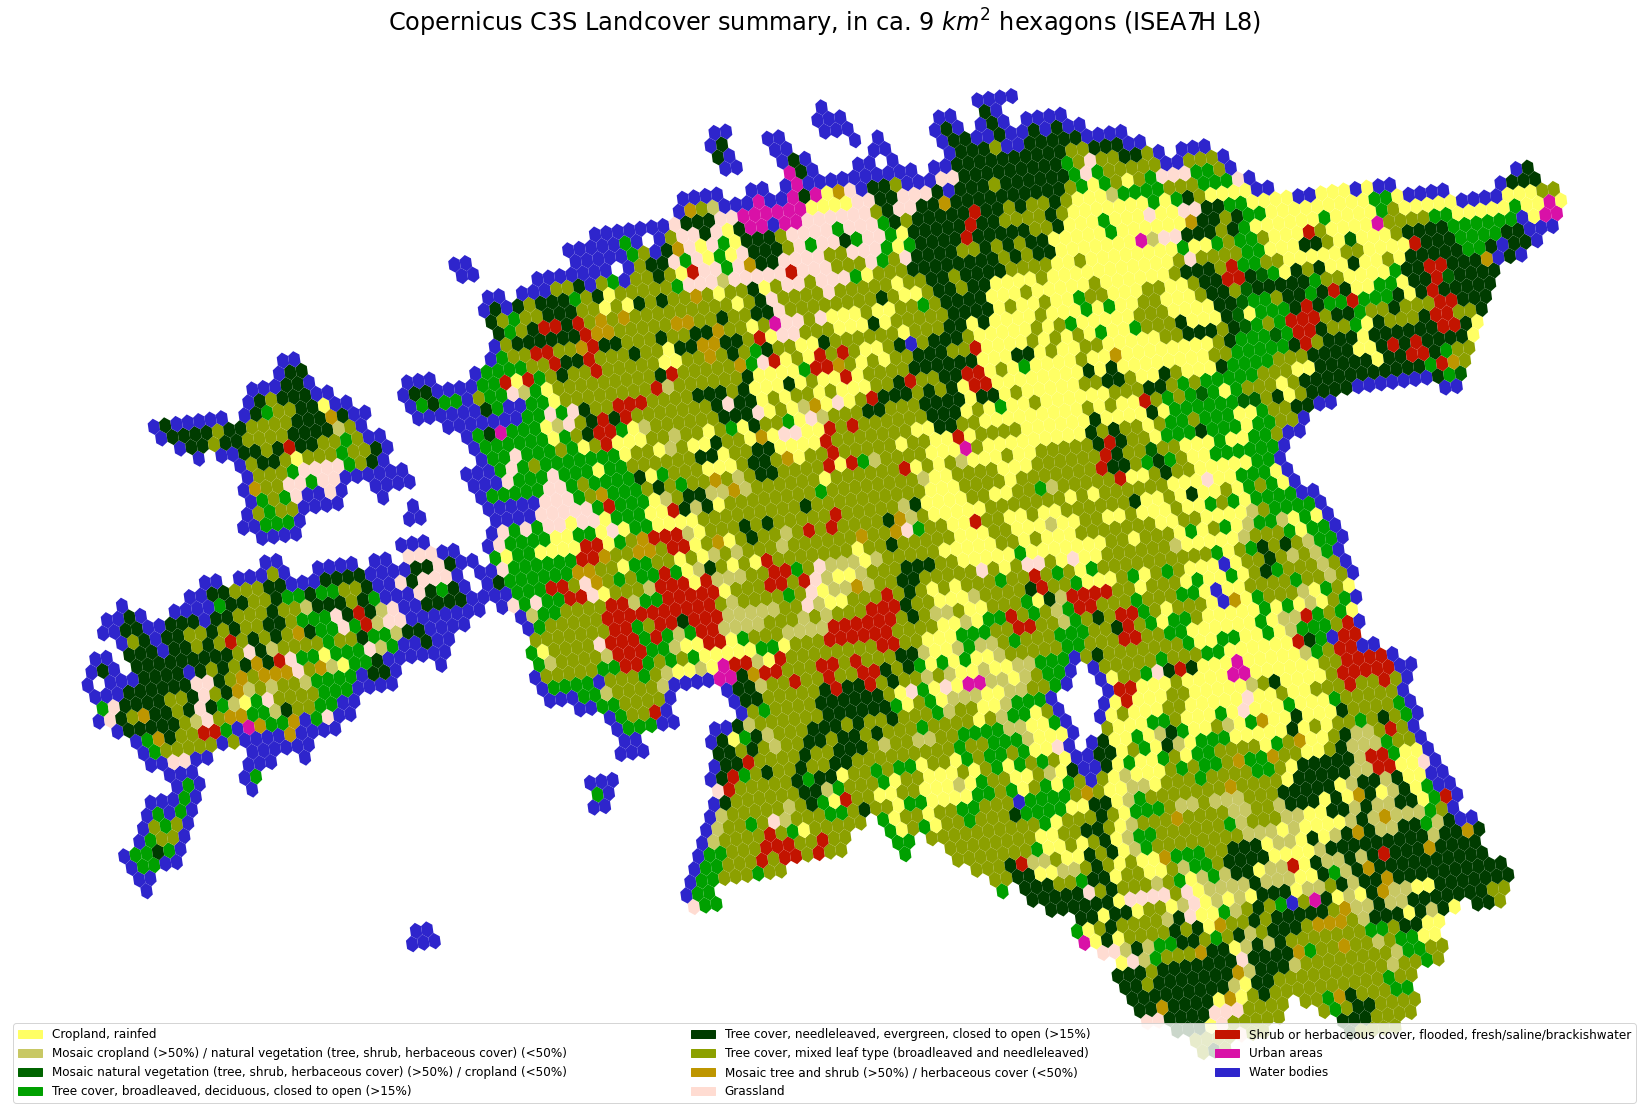

In [280]:
fig, ax = plt.subplots(figsize=(23,19))

est_hex_3301.plot(column='lulc_class_reduced_num', cmap=cci_cmap_uni, ax=ax, categorical=True, legend=True)

ax.set_axis_off()

patchList = []

for tup in flag_info_uni:
    data_key = mpatches.Patch(
        color=tup[1],
        label=leg_dict.get(str(tup[0])))
    patchList.append(data_key)

plt.legend(handles=patchList,
           loc='lower left',
           ncol=3,
           mode='expand',
           fontsize=12
          )

plt.title(r'Copernicus C3S Landcover summary, in ca. 9 $km^2$ hexagons (ISEA7H L8)', fontsize=24)
plt.savefig('../source/_static/day-18-landcover.png')
plt.tight_layout()

In [ ]:
est_hex_3301.to_file('../data_archive/est_hex_landuse_c3s.gpkg', driver='GPKG', layer='est_hex_landuse_c3s')